In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  plotly.express as px

In [2]:
df = pd.read_excel('/content/Power Curve Print.xlsx',sheet_name='Sheet1')

In [3]:
df.head()

,WTG Name,Avg. PC Loss%
0,LAHP 05,-0.152072
1,LAHR 08,-0.128887
2,LAHP 90,-0.065986
3,LAHP 19,-0.026707
4,LH 03,-0.021628


In [4]:
import numpy as np
df['Avg. PC Loss%'] = np.round(df['Avg. PC Loss%']*100,2)

In [5]:
df.head()

,WTG Name,Avg. PC Loss%
0,LAHP 05,-15.21
1,LAHR 08,-12.89
2,LAHP 90,-6.60
3,LAHP 19,-2.67
4,LH 03,-2.16


In [6]:
fig = px.line(df, x='WTG Name', y='Avg. PC Loss%', markers=True)
fig.show()

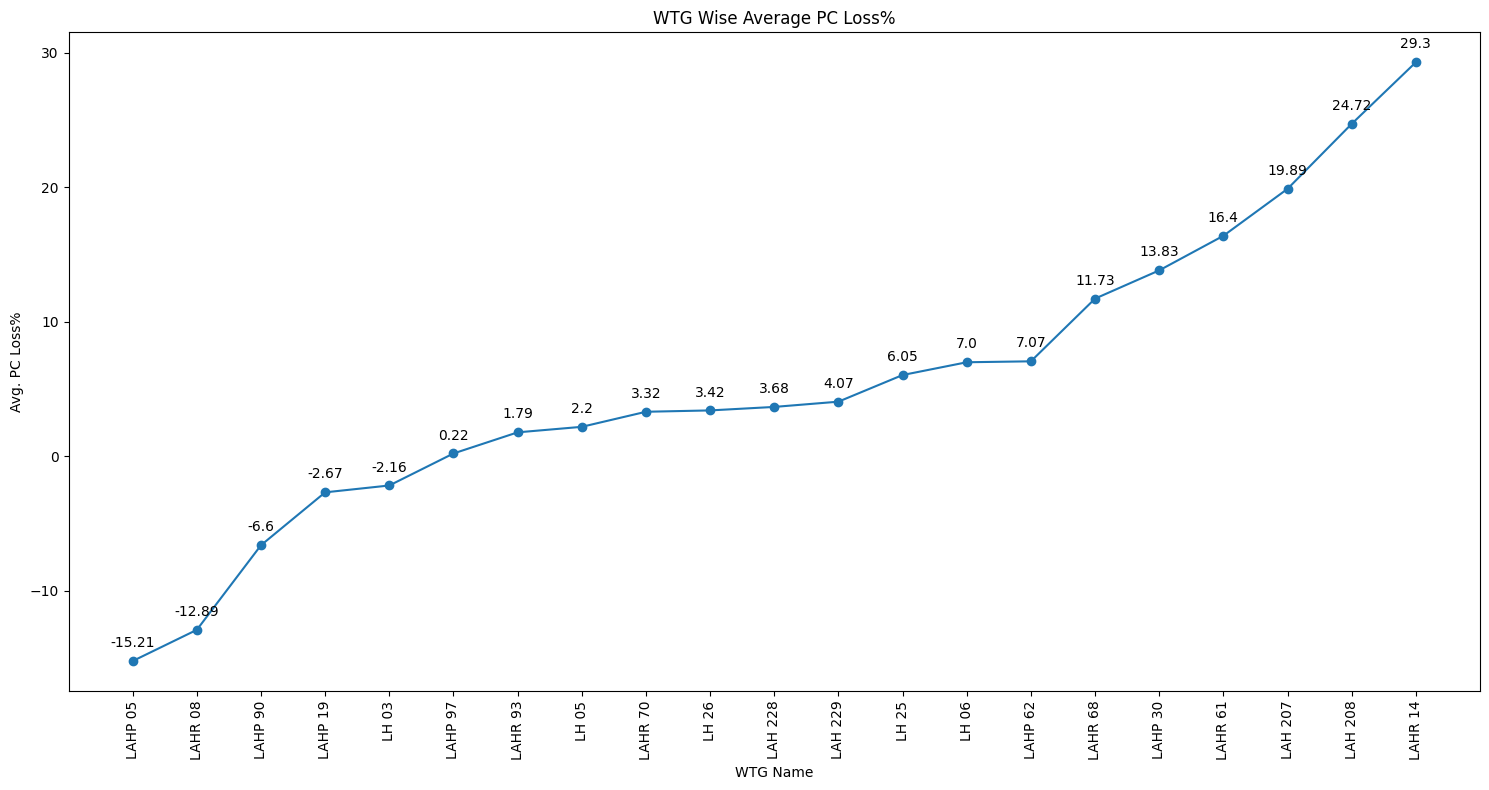

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


def line_chart_with_labels(data, x_label, y_label, title):
  plt.figure(figsize=(15, 8))
  plt.plot(data['WTG Name'], data['Avg. PC Loss%'],marker='o')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  for i, (x, y) in enumerate(zip(data['WTG Name'], data['Avg. PC Loss%'])):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

# Call the custom function
line_chart_with_labels(df, "WTG Name", "Avg. PC Loss%", "WTG Wise Average PC Loss%")

In [8]:
pc_df = pd.read_excel('/content/Power Curve Print.xlsx',sheet_name='pc_data')
pc_df = pc_df[pc_df['PLC Status Minutes']=='Production']
pc_df = pc_df[pc_df['Wind speed (M/sec)']>1]
pc_df.head()

,WTG,Active Power (KW),Wind speed (M/sec),Ambient temperature (cls.),WTG Hub height meter \n(including MSL),Air Pressure,Air density,Standard Power curve Wind speed (m/sec),1,2,3,4,Production Power\nat standard wind speed,PC Loss,Unit Loss (kWh),Revenue Loss,Curtailment Power (kW),PLC Status Minutes
0,LAH 228,134.671173,4.646926,23.984240,546,95193.825732,1.116088,4.506313,4,5,112.8,245.4,167.194906,-0.194526,-5.420622,-13.551555,-32.523733,Production
3,LAH 208,42.573006,3.455878,25.584026,584,94817.459185,1.105722,3.341001,3,4,5.3,112.8,15.036158,1.831375,4.589475,11.473687,27.536848,Production
4,LH 25,173.708069,4.915279,24.815374,571,94941.003956,1.110019,4.757977,4,5,112.8,245.4,203.318013,-0.145634,-4.934991,-12.337477,-29.609944,Production
5,LH 03,282.988220,5.773602,22.079685,580,94786.573152,1.118483,5.602858,5,6,245.4,450.1,353.743139,-0.200018,-11.792486,-29.481216,-70.754919,Production
8,LH 06,325.895081,5.606671,33.630959,581,95013.038479,1.078940,5.376619,5,6,245.4,450.1,308.382019,0.056790,2.918844,7.297109,17.513062,Production


In [9]:

# Round to nearest integer
pc_df['rounded_wind_speed'] = pc_df['Wind speed (M/sec)'].round()

# Adjust to nearest 0.5
pc_df['rounded_wind_speed'] = pc_df['rounded_wind_speed'] + (pc_df['Wind speed (M/sec)'] - pc_df['rounded_wind_speed']).round() * 0.5

pc_df.head()

,WTG,Active Power (KW),Wind speed (M/sec),Ambient temperature (cls.),WTG Hub height meter \n(including MSL),Air Pressure,Air density,Standard Power curve Wind speed (m/sec),1,2,3,4,Production Power\nat standard wind speed,PC Loss,Unit Loss (kWh),Revenue Loss,Curtailment Power (kW),PLC Status Minutes,rounded_wind_speed
0,LAH 228,134.671173,4.646926,23.984240,546,95193.825732,1.116088,4.506313,4,5,112.8,245.4,167.194906,-0.194526,-5.420622,-13.551555,-32.523733,Production,5.0
3,LAH 208,42.573006,3.455878,25.584026,584,94817.459185,1.105722,3.341001,3,4,5.3,112.8,15.036158,1.831375,4.589475,11.473687,27.536848,Production,3.0
4,LH 25,173.708069,4.915279,24.815374,571,94941.003956,1.110019,4.757977,4,5,112.8,245.4,203.318013,-0.145634,-4.934991,-12.337477,-29.609944,Production,5.0
5,LH 03,282.988220,5.773602,22.079685,580,94786.573152,1.118483,5.602858,5,6,245.4,450.1,353.743139,-0.200018,-11.792486,-29.481216,-70.754919,Production,6.0
8,LH 06,325.895081,5.606671,33.630959,581,95013.038479,1.078940,5.376619,5,6,245.4,450.1,308.382019,0.056790,2.918844,7.297109,17.513062,Production,6.0


In [10]:
static_df = pd.read_excel('/content/Power Curve Print.xlsx',sheet_name='static_data')
static_df.head()

,Wind Speed,Power
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0


In [11]:
# Merge DataFrames on different column names
pc_df = pd.merge(pc_df, static_df, left_on='rounded_wind_speed', right_on='Wind Speed', how='inner')
pc_df.head()

,WTG,Active Power (KW),Wind speed (M/sec),Ambient temperature (cls.),WTG Hub height meter \n(including MSL),Air Pressure,Air density,Standard Power curve Wind speed (m/sec),1,2,...,4,Production Power\nat standard wind speed,PC Loss,Unit Loss (kWh),Revenue Loss,Curtailment Power (kW),PLC Status Minutes,rounded_wind_speed,Wind Speed,Power
0,LAH 228,134.671173,4.646926,23.984240,546,95193.825732,1.116088,4.506313,4,5,...,245.4,167.194906,-0.194526,-5.420622,-13.551555,-32.523733,Production,5.0,5.0,245.4
1,LH 25,173.708069,4.915279,24.815374,571,94941.003956,1.110019,4.757977,4,5,...,245.4,203.318013,-0.145634,-4.934991,-12.337477,-29.609944,Production,5.0,5.0,245.4
2,LAHP 62,201.739960,4.903407,23.588472,576,94861.663581,1.113677,4.751641,4,5,...,245.4,202.319145,-0.002863,-0.096531,-0.241327,-0.579185,Production,5.0,5.0,245.4
3,LAH 228,176.242538,4.815141,23.950775,546,95193.160426,1.116206,4.669601,4,5,...,245.4,189.820567,-0.071531,-2.263005,-5.657512,-13.578029,Production,5.0,5.0,245.4
4,LAHP 05,117.501740,5.076045,26.471922,587,94803.961028,1.102289,4.902279,4,5,...,245.4,227.450638,-0.483397,-18.324816,-45.812041,-109.948898,Production,5.0,5.0,245.4


In [12]:
# # Define bins and labels
# bins = [0,2,4,6,8,10,12,14,16,18,20,22,24,26]
# labels = ['0-2', '2-4', '4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24','24-26']

# # Create Wind Speed Group
# pc_df['Wind Speed Group'] = pd.cut(pc_df['Wind speed (M/sec)'], bins=bins, labels=labels, include_lowest=True)

# Convert the entire NumericColumn to string format
pc_df['rounded_wind_speed'] = pc_df['rounded_wind_speed'].astype(str)

# Create pivot table
pivot_table = pd.pivot_table(pc_df,
                             values=['Active Power (KW)'],
                             index=['rounded_wind_speed'],
                             columns=['WTG'],
                             aggfunc='mean',
                             fill_value=0)

print(pivot_table)

                   Active Power (KW)                                         \
WTG                          LAH 207      LAH 208      LAH 228      LAH 229   
rounded_wind_speed                                                            
10.0                     1876.268102  1914.922860  1797.098228  1468.597581   
11.0                     2024.396708  2003.763916  1976.451172  1019.747096   
12.0                     2039.753052  2038.401978     0.000000   942.474854   
13.0                     2050.060791     0.000000     0.000000  1184.160522   
14.0                        0.000000     0.000000     0.000000     0.000000   
2.0                        -0.363344    -0.071613     1.618711     0.088636   
3.0                        19.891849    21.799303    26.461843    14.509468   
4.0                        95.088264    97.973046    78.514462    93.146759   
5.0                       234.028149   238.396209   217.341046   217.471564   
6.0                       450.438062   433.847147   

In [13]:
agg_pc = pivot_table.reset_index()
agg_pc.head()

rounded_wind_speed Active Power (KW)                            \
WTG                              LAH 207      LAH 208      LAH 228   
0                 10.0       1876.268102  1914.922860  1797.098228   
1                 11.0       2024.396708  2003.763916  1976.451172   
2                 12.0       2039.753052  2038.401978     0.000000   
3                 13.0       2050.060791     0.000000     0.000000   
4                 14.0          0.000000     0.000000     0.000000   

                                                                     \
WTG      LAH 229      LAHP 05     LAHP 19      LAHP 30      LAHP 62   
0    1468.597581  1087.945996  694.842292  1858.550520  1839.118114   
1    1019.747096   602.102683  651.774918  1989.482516  1984.783285   
2     942.474854     0.000000  776.290161  2047.363892  2022.148132   
3    1184.160522   389.667358    0.000000  2032.475586  2051.157227   
4       0.000000     0.000000    0.000000     0.000000     0.000000   

                  ...                                                      \
WTG      LAHP 90  ...      LAHR 14      LAHR 61      LAHR 68      LAHR 70   
0    1778.365969  ...  1846.199394  1802.474783  1876.619548  1462.917645   
1    1776.217804  ...  2009.018509  1964.816772  1937.274200  1288.854627   
2    2035.638753  ...  1894.039978  2012.017822  2018.709167     0.000000   
3    2039.887970  ...  2048.946289     0.000000  2000.902832     0.000000   
4       0.000000  ...     0.000000     0.000000     0.000000     0.000000   

                                                                      \
WTG      LAHR 93        LH 03        LH 05        LH 06        LH 25   
0    1776.663787  1711.902588  1800.469987  1745.017815  1778.513252   
1    1933.185974  1925.937541  1987.984358  1983.778966  1758.162923   
2    1992.515076  2000.961365  2028.286987  1986.714661     0.000000   
3       0.000000  2050.059814  1166.375244  2049.842529     0.000000   
4    2043.335938  2049.613037     0.000000     0.000000     0.000000   

                  
WTG        LH 26  
0    1813.029146  
1    1974.705786  
2       0.000000  
3       0.000000  
4       0.000000  

[5 rows x 22 columns]

In [14]:
# Flatten the MultiIndex columns and rename them
agg_pc.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_pc.columns.values]

# Rename columns to match the desired format
agg_pc.columns = [col.replace(' ', '_').replace('(', '').replace(')', '') for col in agg_pc.columns]

agg_pc.head()

,rounded_wind_speed,Active_Power_KW_LAH_207,Active_Power_KW_LAH_208,Active_Power_KW_LAH_228,Active_Power_KW_LAH_229,Active_Power_KW_LAHP_05,Active_Power_KW_LAHP_19,Active_Power_KW_LAHP_30,Active_Power_KW_LAHP_62,Active_Power_KW_LAHP_90,...,Active_Power_KW_LAHR_14,Active_Power_KW_LAHR_61,Active_Power_KW_LAHR_68,Active_Power_KW_LAHR_70,Active_Power_KW_LAHR_93,Active_Power_KW_LH_03,Active_Power_KW_LH_05,Active_Power_KW_LH_06,Active_Power_KW_LH_25,Active_Power_KW_LH_26
0,10.0,1876.268102,1914.922860,1797.098228,1468.597581,1087.945996,694.842292,1858.550520,1839.118114,1778.365969,...,1846.199394,1802.474783,1876.619548,1462.917645,1776.663787,1711.902588,1800.469987,1745.017815,1778.513252,1813.029146
1,11.0,2024.396708,2003.763916,1976.451172,1019.747096,602.102683,651.774918,1989.482516,1984.783285,1776.217804,...,2009.018509,1964.816772,1937.274200,1288.854627,1933.185974,1925.937541,1987.984358,1983.778966,1758.162923,1974.705786
2,12.0,2039.753052,2038.401978,0.000000,942.474854,0.000000,776.290161,2047.363892,2022.148132,2035.638753,...,1894.039978,2012.017822,2018.709167,0.000000,1992.515076,2000.961365,2028.286987,1986.714661,0.000000,0.000000
3,13.0,2050.060791,0.000000,0.000000,1184.160522,389.667358,0.000000,2032.475586,2051.157227,2039.887970,...,2048.946289,0.000000,2000.902832,0.000000,0.000000,2050.059814,1166.375244,2049.842529,0.000000,0.000000
4,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2043.335938,2049.613037,0.000000,0.000000,0.000000,0.000000


In [15]:
# Plotting
wtg_names = ['LAHR_08','LAHR_14','LAHP_97','LAHP_90','LH_03','LAH_228','LAH_229',
             'LH_05','LAHR_93','LAHR_70','LAHR_76','LAHP_30','LH_25','LH_26','LAHR_61',
             'LAHP_62','LAHP_05','LH_06','LAHR_68','LAHP_19','LAH_207','LAH_208']

agg_pc['rounded_wind_speed'] = pd.to_numeric(agg_pc['rounded_wind_speed'])
# Sort the DataFrame by the values in 'NumericColumn' in place
agg_pc.sort_values(by='rounded_wind_speed', inplace=True)

# Reset the index to maintain a clean DataFrame
agg_pc.reset_index(drop=True, inplace=True)

# Merge DataFrames on different column names
agg_pc = pd.merge(agg_pc, static_df, left_on='rounded_wind_speed', right_on='Wind Speed', how='left')

# Replace active power with 2033 where wind speed is greater than 12 and active power is 0 for each turbine
for column in agg_pc.columns:
    if column.startswith('Active_Power_KW_'):
        condition = (agg_pc['rounded_wind_speed'] >= 12) & (agg_pc[column] == 0)
        agg_pc.loc[condition, column] = 2033
# Dropping a single column
agg_pc = agg_pc.drop('rounded_wind_speed', axis=1)
agg_pc

,Active_Power_KW_LAH_207,Active_Power_KW_LAH_208,Active_Power_KW_LAH_228,Active_Power_KW_LAH_229,Active_Power_KW_LAHP_05,Active_Power_KW_LAHP_19,Active_Power_KW_LAHP_30,Active_Power_KW_LAHP_62,Active_Power_KW_LAHP_90,Active_Power_KW_LAHP_97,...,Active_Power_KW_LAHR_68,Active_Power_KW_LAHR_70,Active_Power_KW_LAHR_93,Active_Power_KW_LH_03,Active_Power_KW_LH_05,Active_Power_KW_LH_06,Active_Power_KW_LH_25,Active_Power_KW_LH_26,Wind Speed,Power
0,-0.363344,-0.071613,1.618711,0.088636,-0.839653,-0.473656,-1.331277,-0.875295,-0.840275,0.000000,...,0.000000,-1.097659,0.000000,0.000000,0.000000,9.887482,-1.550849,0.000000,2.0,0.0
1,19.891849,21.799303,26.461843,14.509468,20.689664,32.791912,19.876508,15.954991,5.768273,15.357532,...,18.593370,25.237292,14.412720,12.078740,16.030393,12.022390,17.617203,16.440266,3.0,5.3
2,95.088264,97.973046,78.514462,93.146759,85.409115,107.938562,93.667636,94.387623,60.529408,78.138315,...,81.910376,101.923905,85.430562,72.152347,74.550080,61.237802,81.135426,75.773664,4.0,112.8
3,234.028149,238.396209,217.341046,217.471564,210.532994,242.594175,209.476779,221.420117,210.291848,206.830874,...,227.386444,210.154491,197.195429,192.442602,200.279631,156.058957,216.041196,211.177793,5.0,245.4
4,450.438062,433.847147,381.631955,401.239791,396.228330,438.342162,410.646814,436.352758,397.907470,385.702635,...,424.213651,377.208545,385.187311,385.057975,426.098070,378.892058,407.349969,388.065867,6.0,450.1
5,746.078819,725.843223,655.050850,678.693405,629.161711,709.849339,690.478899,710.876328,678.159983,656.801490,...,695.410697,638.467069,633.583896,616.664356,684.856103,664.582603,692.713789,655.554751,7.0,761.7
6,1162.516133,1121.600295,1003.999858,1048.909709,836.456214,909.378076,1077.868562,1060.855487,1026.938729,1039.745199,...,1056.365178,972.045252,1008.473915,921.591231,1023.582439,1021.994299,1027.561919,972.847764,8.0,1117.6
7,1586.659606,1577.612445,1373.291579,1364.694431,1014.243652,743.582647,1473.820406,1504.938616,1442.440264,1431.968577,...,1484.680259,1198.229085,1382.592037,1315.094477,1471.550602,1431.768232,1471.495381,1450.195035,9.0,1580.0
8,1876.268102,1914.922860,1797.098228,1468.597581,1087.945996,694.842292,1858.550520,1839.118114,1778.365969,1808.764443,...,1876.619548,1462.917645,1776.663787,1711.902588,1800.469987,1745.017815,1778.513252,1813.029146,10.0,1909.6
9,2024.396708,2003.763916,1976.451172,1019.747096,602.102683,651.774918,1989.482516,1984.783285,1776.217804,1941.634424,...,1937.274200,1288.854627,1933.185974,1925.937541,1987.984358,1983.778966,1758.162923,1974.705786,11.0,2003.5


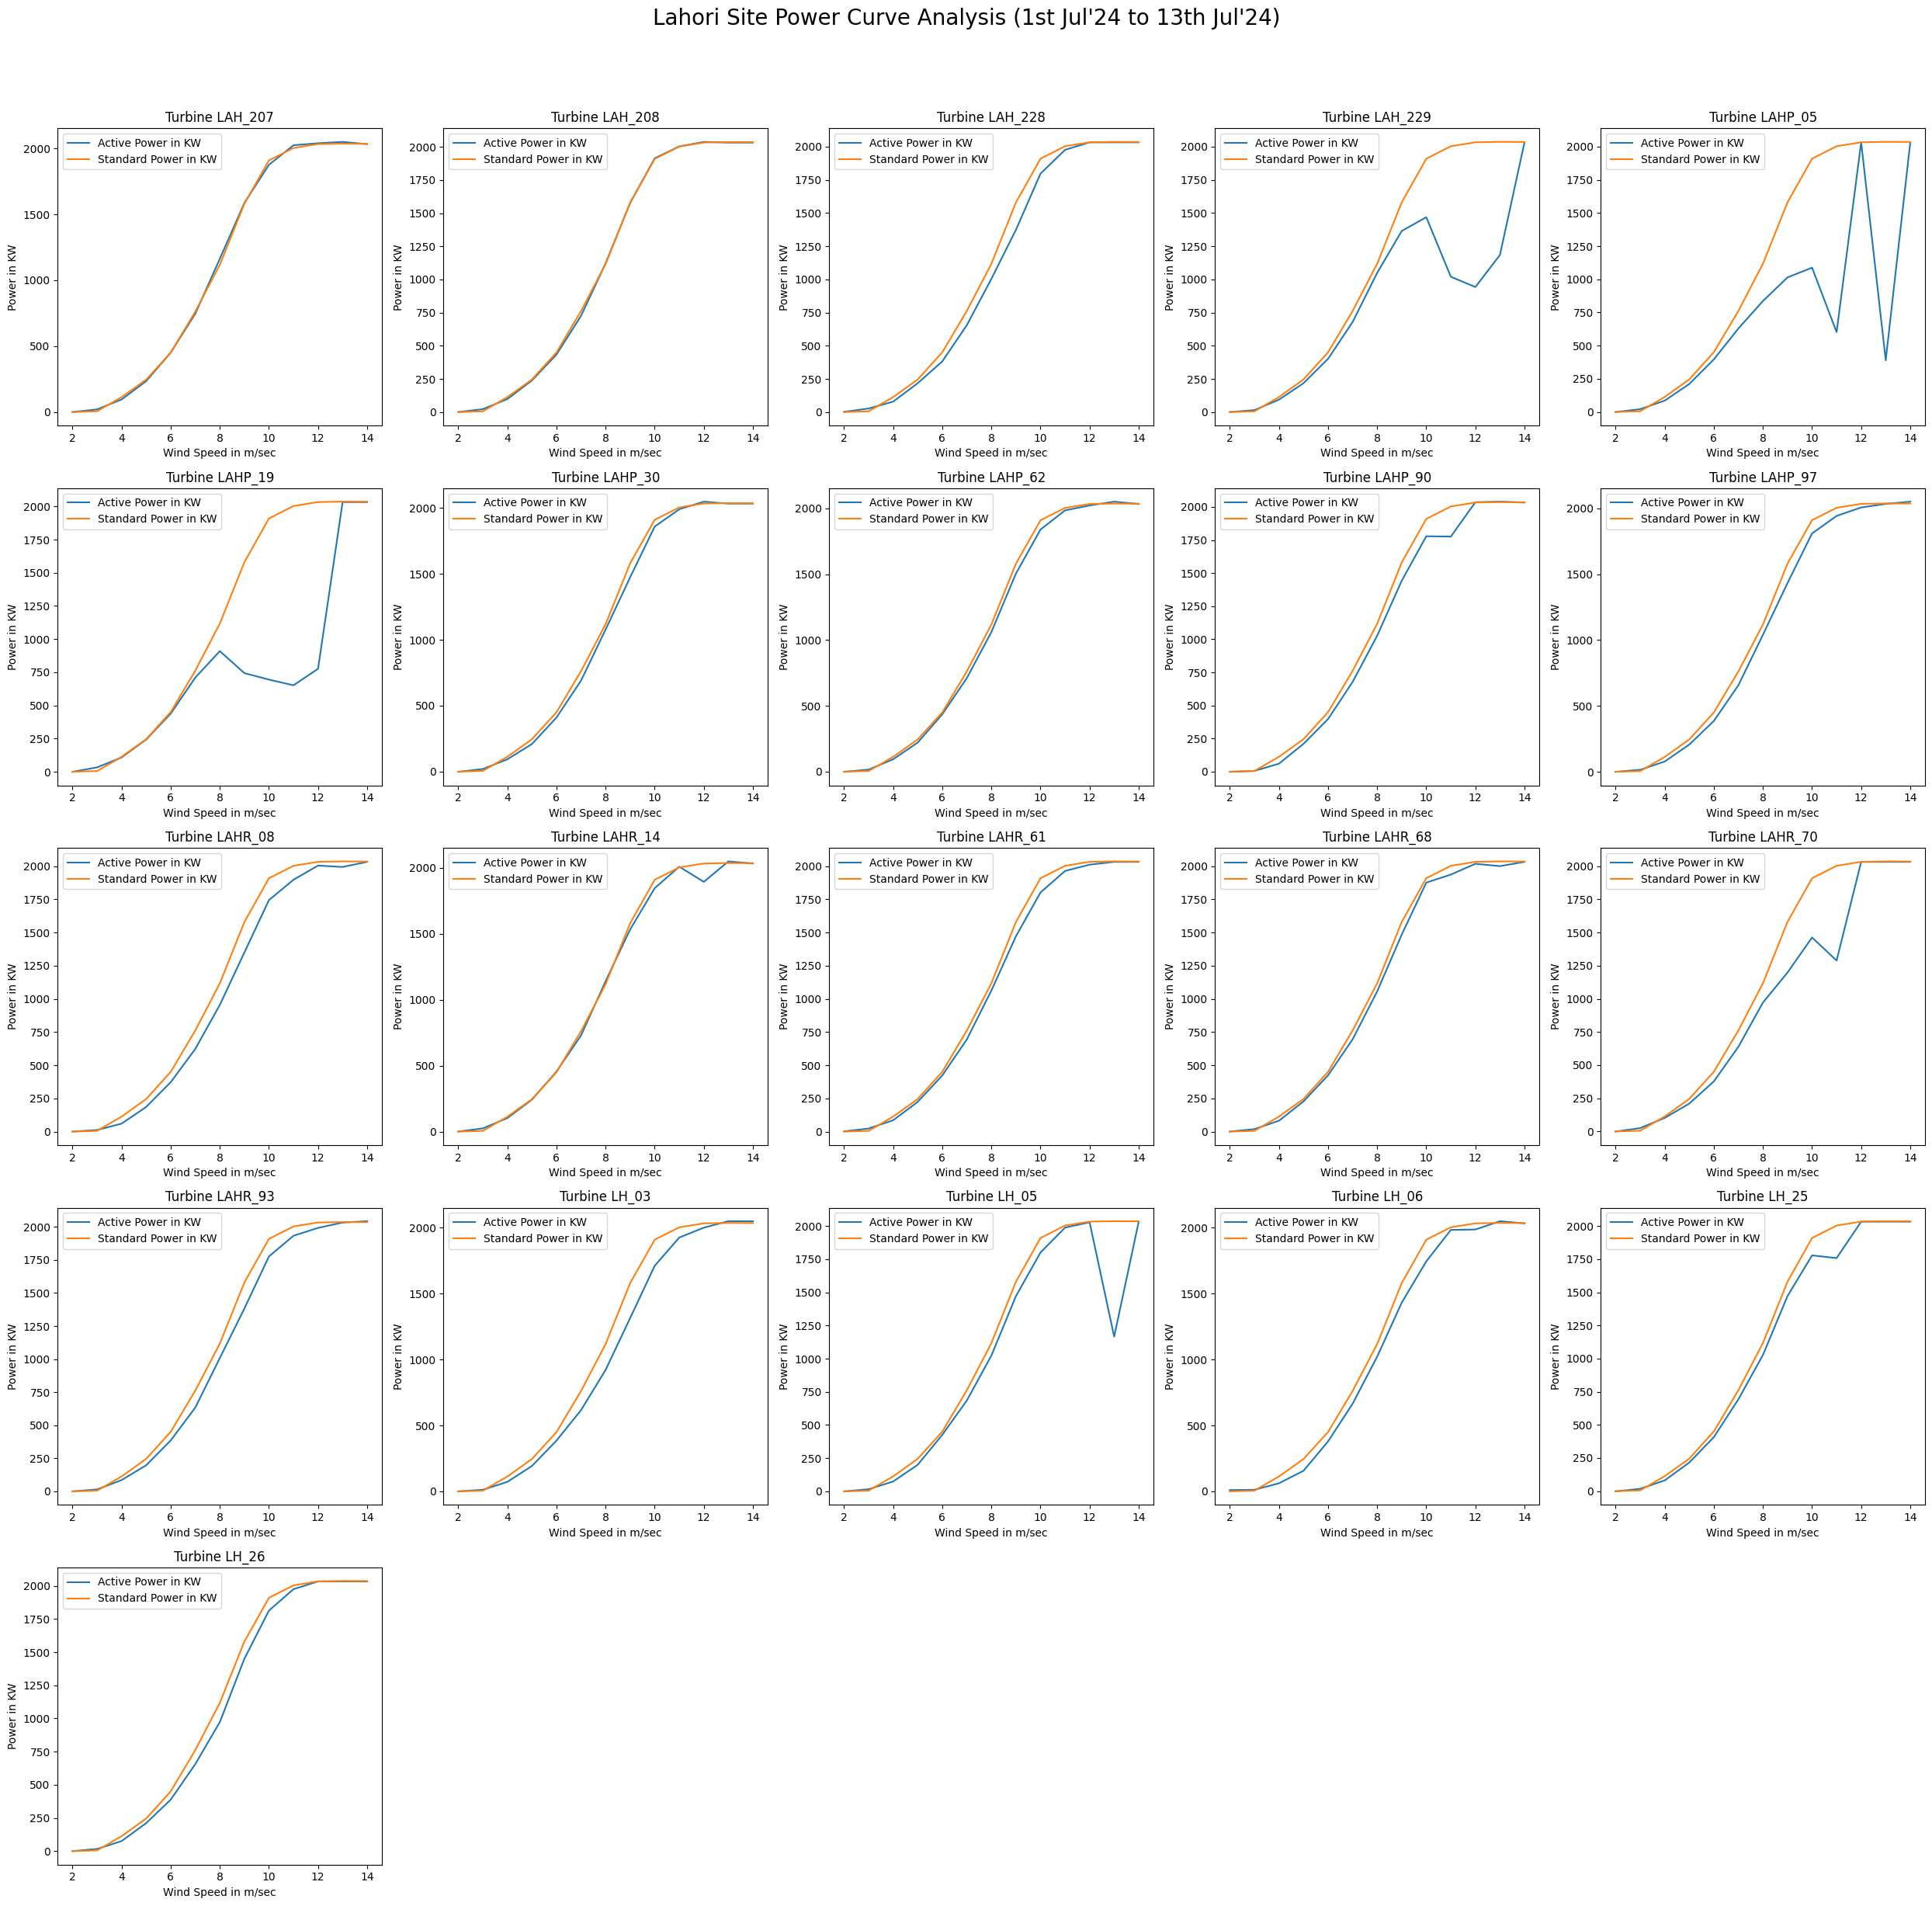

In [16]:


# Extract turbine names from column names
turbine_columns = agg_pc.columns[:-2]  # Exclude 'Standard power' and 'Wind speed'
turbine_names = [col.split('_')[-2] + '_' + col.split('_')[-1] for col in turbine_columns]

# Number of turbines
num_turbines = len(turbine_columns)

# Number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_rows = (num_turbines + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(25, 5 * num_rows))
axs = axs.flatten()

# Plot power curves for each turbine
for i in range(num_turbines):
    ax = axs[i]
    sns.lineplot(x='Wind Speed', y=agg_pc.columns[i], data=agg_pc, ax=ax, label='Active Power in KW')
    sns.lineplot(x='Wind Speed', y='Power', data=agg_pc, ax=ax, label='Standard Power in KW')
    ax.set_title(f'Turbine {turbine_names[i]}')
    ax.set_xlabel('Wind Speed in m/sec')
    ax.set_ylabel('Power in KW')
    ax.legend()

# Remove any unused subplots
for j in range(num_turbines, num_rows * plots_per_row):
    fig.delaxes(axs[j])

# Add a title to the entire figure
fig.suptitle("Lahori Site Power Curve Analysis (1st Jul'24 to 13th Jul'24)", fontsize=20)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
plt.savefig("power_curves_of_wind_turbines_1st_Jul'24_to_13th_Jul'24.png",dpi=300)

# Show plot
plt.show()